# Twitter Data Sentiment Analysis¶

- 1) Twitter Data:- First step is to configure twitter API and gather twitter data
- 2) Clean the data
- 3) Sentiment:- To find out sentiments
- 4) Analysis:- To do analysis

In [11]:
#!pip install tweepy 
#!pip install textblob 
#!pip install wordcloud

Testing instances: 100%|████████████████████████| 14/14 [00:23<00:00,  1.69s/it]


In [37]:
import tweepy 
from textblob import TextBlob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud

In [144]:
# Twitter Api  Credentials
APIkey= "JdKJcLhxOzmaGbLj3K5uIxKxV"
APISecretKey= "H9FDqhkqVCoZxywX6ZD3Ed8N1F4JPqAuUON73PFtN9NhI80DAs"
accessToken= "1878321683007987713-YmRXgHfX5tHiVEPdn1mdTmqgyjTKOX"
accessTokenSecret= "MgUatPhbSePuwylFkydSRgfaSA6uCm93rCWooT3hXuH9c"

In [146]:

# Replace with your credentials
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAACRhyAEAAAAA%2F0OXZXXjxxHYCuuKLGjO5Ags1u0%3D2yqVoVoo8kbBduGUlk65ZV9lVaJTFFyEz9xW2IzCOJ1iwqCVVw"

# Using Client for v2 API
client = tweepy.Client(bearer_token=BEARER_TOKEN,consumer_key=APIkey,
    consumer_secret=APISecretKey,
    access_token=accessToken,
    access_token_secret=accessTokenSecret,)
# Example: Getting recent tweets
tweets = client.search_recent_tweets(query="Trump",max_results=90)



In [220]:
tweets

Response(data=[<Tweet id=1879425198170280178 text='RT @ConnieKR016: Holy Forever 🙏🏼❤️🕊️💙🇺🇸\nBarron Trump https://t.co/gEvqqkQq2v'>, <Tweet id=1879425197977301165 text='RT @realmarcel1: Hanouna a demandé à son pote random de raconter qu’il est invité d’honneur par Trump et Musk au dîner payant à Mar-A-Lago.…'>, <Tweet id=1879425197889175627 text='RT @WallStreetApes: James O’Keefe just exposed The Pentagon is secretly working to sabotage our new commander in chief Donald Trump\n\nThis i…'>, <Tweet id=1879425197734011020 text="RT @addicted2newz: Twelve world leaders have been invited to Trump's inauguration. \n\nKeir Starmer has not been invited.\n\nThis is what happe…">, <Tweet id=1879425197327217141 text='RT @pepesgrandma: 🔥Pentagon advisor who was fired for colluding against Trump was a contractor from Booz Allen Hamilton. \n\nRecall Trump’s i…'>, <Tweet id=1879425197025198583 text='RT @MediumSizeMeech: Barack Obama: “Michelle come on, I told you we gotta get ready to go to Trump’s ina

# Formatting and Saving the Data

In [222]:
tweets_data= tweets.data  # Access the `data` attribute

# Check if the response contains data
if tweets_data:
    # Extract tweet details into a list of dictionaries
    tweet = [{"id": tweet.id, "text": tweet.text} for tweet in tweets_data]

    # Convert to a DataFrame
    df = pd.DataFrame(tweet)

    # Save as CSV
    csv_file_path = "tweet.csv"
    df.to_csv(csv_file_path, index=False, encoding="utf-8")
    print(f"CSV file saved as {csv_file_path}")
else:
    print("No data found in the response.")

CSV file saved as tweet.csv


In [228]:
df1 = pd.read_csv('tweet.csv')
df1

,id,text
0,1879425198170280178,RT @ConnieKR016: Holy Forever 🙏🏼❤️🕊️💙🇺🇸\nBarro...
1,1879425197977301165,RT @realmarcel1: Hanouna a demandé à son pote ...
2,1879425197889175627,RT @WallStreetApes: James O’Keefe just exposed...
3,1879425197734011020,RT @addicted2newz: Twelve world leaders have b...
4,1879425197327217141,RT @pepesgrandma: 🔥Pentagon advisor who was fi...
...,...,...
85,1879425170861158769,"RT @ensonhaber: Zafer Şahin:\n\n""Almanya’da se..."
86,1879425170458488848,"RT @SenJohnKennedy: This week, left wingers in..."
87,1879425169841967604,@TRUMP_ARMY_ @elonmusk Absolutely 💯
88,1879425169749618799,RT @Lukewearechange: I’m gonna s*** myself in ...


# Cleaning the Tweets

In [230]:
def clean_text(text):
    # Remove mentions (@username)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # Remove hashtags (#)
    text = re.sub(r'#', '', text)
    # Remove retweet indicators (RT)
    text = re.sub(r'\bRT\b[\s]+', '', text)
    # Remove URLs
    text = re.sub(r'https?://\S+', '', text)
    # Remove emojis (Unicode range for emojis)
    text = re.sub(r'[\U0001F600-\U0001F64F'  # Emoticons
                  r'\U0001F300-\U0001F5FF'  # Symbols & Pictographs
                  r'\U0001F680-\U0001F6FF'  # Transport & Map Symbols
                  r'\U0001F1E0-\U0001F1FF'  # Flags (iOS)
                  r'\U00002500-\U00002BEF'  # Chinese characters
                  r'\U00002702-\U000027B0'  # Dingbats
                  r'\U00002700-\U000027BF'  # Misc symbols
                  r'\U000024C2-\U0001F251]+', '', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [238]:
df1['text']= df['text'].apply(clean_text)
df1

,id,text,Subjectivity,Polarity
0,1879425198170280178,: Holy Forever Barron Trump,0.000000,0.000000
1,1879425197977301165,: Hanouna a demandé à son pote random de racon...,0.500000,-0.500000
2,1879425197889175627,: James O’Keefe just exposed The Pentagon is s...,0.577273,-0.131818
3,1879425197734011020,: Twelve world leaders have been invited to Tr...,0.000000,0.000000
4,1879425197327217141,: Pentagon advisor who was fired for colluding...,0.000000,0.000000
...,...,...,...,...
85,1879425170861158769,": Zafer Şahin: ""Almanya’da sel oldu. Merkel, '...",0.000000,0.000000
86,1879425170458488848,": This week, left wingers in Britain are rushi...",0.366667,-0.300000
87,1879425169841967604,Absolutely,0.900000,0.200000
88,1879425169749618799,: I’m gonna s*** myself in happiness if Donald...,0.200000,0.700000


# Finding the Sentiments of the Tweets

In [240]:
# create a function to get the subjectivity of all the tweets
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# create a function to get the Polarity of all the tweets
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# create 2 columns 'Subjectivity' and 'Polarity'
df1['Subjectivity']= df1['text'].apply(getSubjectivity)
df1['Polarity']= df1['text'].apply(getPolarity)

In [242]:
df1

,id,text,Subjectivity,Polarity
0,1879425198170280178,: Holy Forever Barron Trump,0.000000,0.000000
1,1879425197977301165,: Hanouna a demandé à son pote random de racon...,0.500000,-0.500000
2,1879425197889175627,: James O’Keefe just exposed The Pentagon is s...,0.577273,-0.131818
3,1879425197734011020,: Twelve world leaders have been invited to Tr...,0.000000,0.000000
4,1879425197327217141,: Pentagon advisor who was fired for colluding...,0.000000,0.000000
...,...,...,...,...
85,1879425170861158769,": Zafer Şahin: ""Almanya’da sel oldu. Merkel, '...",0.000000,0.000000
86,1879425170458488848,": This week, left wingers in Britain are rushi...",0.366667,-0.300000
87,1879425169841967604,Absolutely,0.900000,0.200000
88,1879425169749618799,: I’m gonna s*** myself in happiness if Donald...,0.200000,0.700000


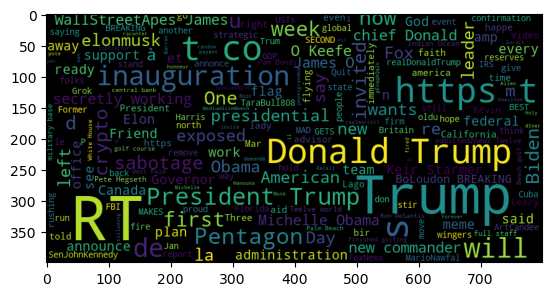

In [244]:
# Word Cloud Visualization
allwords= ' '.join([i for i in df['text']])
Cloud= WordCloud(width=800,height=400,random_state=0,max_font_size=100).generate(allwords)

plt.imshow(Cloud)
plt.show()

In [246]:
def sentimentAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

df1['Sentiment']= df1['Polarity'].apply(sentimentAnalysis)
df1

,id,text,Subjectivity,Polarity,Sentiment
0,1879425198170280178,: Holy Forever Barron Trump,0.000000,0.000000,Neutral
1,1879425197977301165,: Hanouna a demandé à son pote random de racon...,0.500000,-0.500000,Negative
2,1879425197889175627,: James O’Keefe just exposed The Pentagon is s...,0.577273,-0.131818,Negative
3,1879425197734011020,: Twelve world leaders have been invited to Tr...,0.000000,0.000000,Neutral
4,1879425197327217141,: Pentagon advisor who was fired for colluding...,0.000000,0.000000,Neutral
...,...,...,...,...,...
85,1879425170861158769,": Zafer Şahin: ""Almanya’da sel oldu. Merkel, '...",0.000000,0.000000,Neutral
86,1879425170458488848,": This week, left wingers in Britain are rushi...",0.366667,-0.300000,Negative
87,1879425169841967604,Absolutely,0.900000,0.200000,Positive
88,1879425169749618799,: I’m gonna s*** myself in happiness if Donald...,0.200000,0.700000,Positive


In [248]:
df1['Sentiment'].value_counts()

Sentiment
Neutral     36
Positive    33
Negative    21
Name: count, dtype: int64

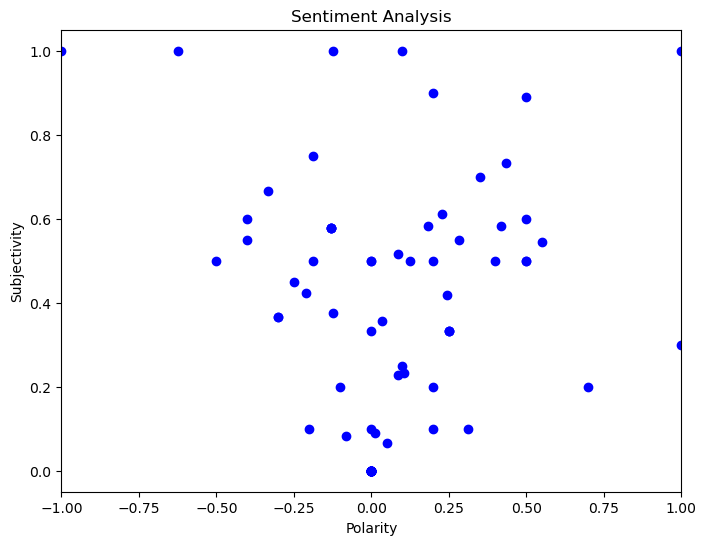

In [250]:
# plotting scatter plot
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df1['Polarity'][i],df1['Subjectivity'][i],color='Blue')
    
plt.title("Sentiment Analysis")
plt.xlim(-1,1)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


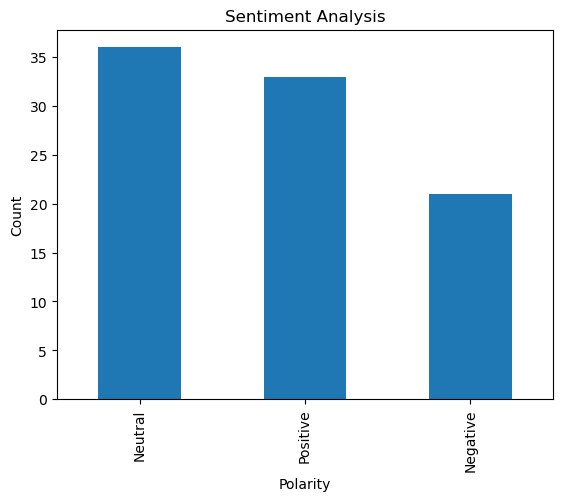

In [254]:
df1['Sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()